In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Limit memory growth

In [2]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
  except RuntimeError as e:
    print(e)

In [3]:
pwd

'/home/zeph'

In [4]:
base="/home/zeph/trafficsystem"
print(os.listdir(base))

['Test.csv', 'train', 'meta', 'Train.csv', 'Meta', 'test', 'Meta.csv', 'Train', 'Test']


In [5]:
len(os.listdir(os.path.join(base,"Train")))

43

There are a total of 43 Classes

In [6]:
data=[]
labels=[]
classes=43
for i in range(classes):
    path=os.path.join(base,"Train",str(i))
    images=os.listdir(path)
    
    for item in images:
        try:
            image=Image.open(path+"/"+item)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            pass
data=np.array(data)
labels=np.array(labels)

### We converted the Images into arrays and collected the labels according to the folder index.

In [7]:
data.shape

(39209, 30, 30, 3)

In [8]:
labels.shape

(39209,)

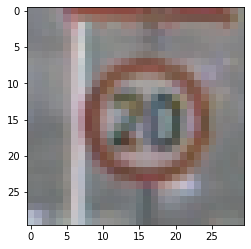

In [9]:
plt.imshow(data[10,:,:,:])

## Splitting the Data into Training and Validation Sets

In [10]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,test_size=0.15,random_state=54)


### Normalising the Training Set and Validation Set

In [11]:
X_train=X_train/255
X_val=X_val/255

In [12]:
print(X_train.shape)
print(X_val.shape)

(33327, 30, 30, 3)
(5882, 30, 30, 3)


### Converting each entry in Label array to one-hot vectors

In [13]:
Y_train=to_categorical(Y_train,classes)
Y_val=to_categorical(Y_val,classes)

### Building Convolutional Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [15]:
model=Sequential()
## 1st layer
model.add(Conv2D(filters=64,kernel_size=(5,5),padding="Same",activation="relu",input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## 2nd Layer
model.add(Conv2D(filters=64,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


##3rd Layer
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

##4th Layer
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
## Flatten Layer
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(43,activation="softmax"))
model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

### We will attach a callback which will monitor the Learning Rate.

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [18]:
callback=ReduceLROnPlateau(monitor="val_accuracy",patience=3,verbose=0,factor=0.7,min_lr=0.0001)

In [19]:
history=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=15,verbose=1,callbacks=[callback])

Epoch 1/15
1042/1042 [==============================] - 123s 118ms/step - loss: 1.9732 - accuracy: 0.4326 - val_loss: 0.5330 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 2/15
1042/1042 [==============================] - 121s 116ms/step - loss: 0.5029 - accuracy: 0.8384 - val_loss: 0.1804 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 3/15
1042/1042 [==============================] - 124s 119ms/step - loss: 0.2622 - accuracy: 0.9163 - val_loss: 0.1030 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 4/15
1042/1042 [==============================] - 125s 120ms/step - loss: 0.1947 - accuracy: 0.9400 - val_loss: 0.2191 - val_accuracy: 0.9277 - lr: 0.0010
Epoch 5/15
1042/1042 [==============================] - 123s 118ms/step - loss: 0.1399 - accuracy: 0.9568 - val_loss: 0.0610 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 6/15
1042/1042 [==============================] - 124s 119ms/step - loss: 0.1326 - accuracy: 0.9576 - val_loss: 0.0581 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 7/15
1042/1042 [============

### Visualizing the Data

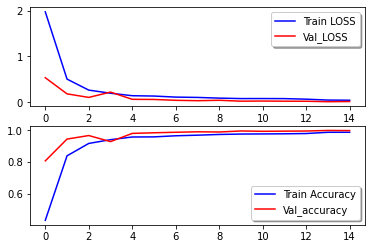

In [20]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history.history["loss"],color="b",label="Train LOSS")
ax[0].plot(history.history["val_loss"],color="r",label="Val_LOSS",axes=ax[0])
legend=ax[0].legend(loc="best",shadow=True)
ax[1].plot(history.history["accuracy"],color="b",label="Train Accuracy")
ax[1].plot(history.history["val_accuracy"],color="r",label="Val_accuracy")
legend=ax[1].legend(loc="best",shadow=True)

### Using the test set

In [28]:
test_data=pd.read_csv("trafficsystem/Test.csv")

In [29]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [43]:
image_file_path = test_data['Path'].values
print(image_file_path[:5])

test_labels = test_data['ClassId'].values
print(test_labels[:5])

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' 'Test/00003.png'
 'Test/00004.png']
[16  1 38 33 11]


In [44]:
data=[]

for img in image_file_path:
    image = Image.open(base + '/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
X_test = X_test/255.

In [36]:
pred=model.predict_classes(X_test)

In [40]:
from sklearn.metrics import accuracy_score,f1_score

In [41]:
accuracy_score(test_labels,pred)

0.9668250197941409